## Set the bottom 2D section (the surface) of the block grid

### Set the total number of cells (Control Volumes) in I and J directions

In [ ]:
# Number of cells in I and J direction
while True:
    try:
        NICV = int(input("NICV: "))
        NJCV = int(input("NJCV: "))
        if NICV > 0 and NJCV > 0:
            break
        else:
            print("Only positive integers values are valid. Try again.")
    except:
        print("Only positive integers values are valid. Try again.")


### Define the edges. (South, North, West, East) 

In [ ]:
# Define edges names (2D bottom section)
edges = ("South", "North", "West", "East")

### Generate the 2D section interactively

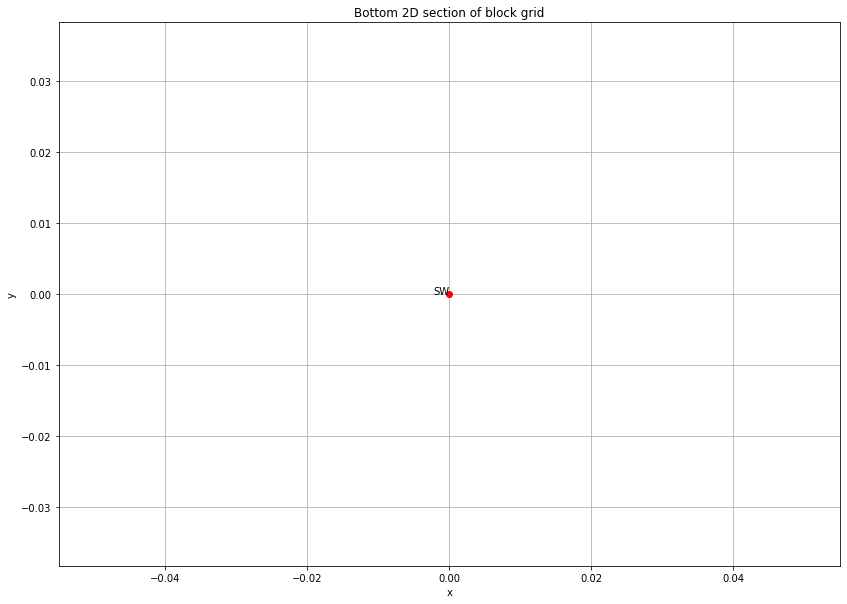

Coordinates (x,y) of endpoint in segment 1 of South edge


In [ ]:
# Define edges names (2D bottom section)
edges = ("South", "North", "West", "East")

# Third-party modules
from matplotlib import pyplot as plt

# Local modules
from pre.makegrid import makesurf

# Generate the surface of a grid block interactively
# uniform cell distribution in all edges by default (uniform_cells=True0
# Straight lines goes West-East by default (IDIR=1)
makesurf(edges, 100, 20, uniform_cells=True, IDIR=1)

# Prevent duplicate figures.
# By default Jupyter displays the last function return. We've already display the figure using IPython.display through ifig() function)
plt.close()